# Seaborn

## Import

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline
# %matplotlib notebook

## Dataset

In [53]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


In [54]:
tips.shape

(244, 8)

In [55]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Gráfico de Barras 1 entrada

#### Countplot 

* `Countplot` com uma entrada utiliza da frequência para cada valor da variável em questão;
* Usado em disretas, ordinais e nominais.

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='time', ylabel='count'>

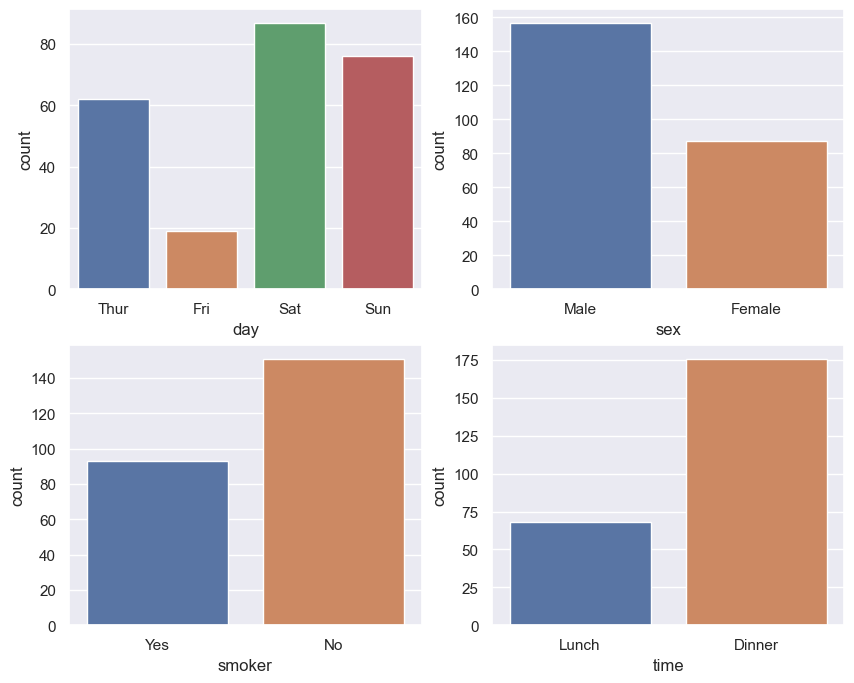

In [15]:
# Os gráficos funcionam dentro da lógica do matplotlib
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax=axes[0, 0], x='day', data=tips)
sns.countplot(ax=axes[0, 1], x='sex', data=tips)
sns.countplot(ax=axes[1, 0], x='smoker', data=tips)
sns.countplot(ax=axes[1, 1], x='time', data=tips)

In [16]:
axes

array([[<Axes: xlabel='day', ylabel='count'>,
        <Axes: xlabel='sex', ylabel='count'>],
       [<Axes: xlabel='smoker', ylabel='count'>,
        <Axes: xlabel='time', ylabel='count'>]], dtype=object)

In [17]:
type(axes)

numpy.ndarray

#### Barplot

* `Barplot` utiliza duas entradas (x e y) onde y por padrão é a média do valor em questão;
* O parâmetro estimator designa o tamanho da barra sendo a média (padrão) ou soma dos valores por exemplo;
* Usado em variáveis contínuas, discretas, ordinais e nominais.

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

<Axes: xlabel='day', ylabel='tip'>

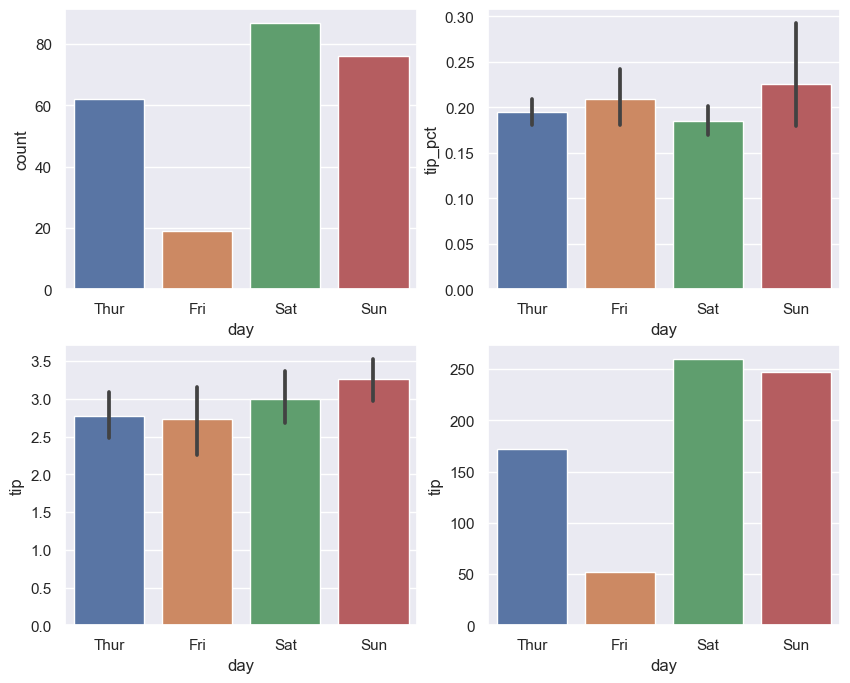

In [18]:
plt.close('all')
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0,0], x='day',data=tips)
sns.barplot(ax = axes[0, 1], x='day', y='tip_pct', data=tips)
sns.barplot(ax = axes[1, 0], x='day', y='tip', data=tips)
sns.barplot(ax = axes[1, 1], x='day', y='tip', estimator=sum, data=tips, errorbar=None)

#### Paretto

* O gráfico de `Paretto` utiliza como prioridade a contagem, ou seja, a relevância da variável em y;
* Variáveis discretas, ordinais e nominais.

In [19]:
df = pd.DataFrame({'contagem': [43, 20, 174, 5, 2, 1, 1, 0]})
df.index = ['Produto com defeito', 'Produto errado', 'Tempo de entrega', 
            'Horário de entrega', 'Mau atendimento', 'Valor errado', 'Não serve', 'Desistência']

df = df.sort_values(by='contagem',ascending=False)
df["pctacum"] = df["contagem"].cumsum()/df["contagem"].sum()*100

df

,contagem,pctacum
Tempo de entrega,174,70.731707
Produto com defeito,43,88.211382
Produto errado,20,96.341463
Horário de entrega,5,98.373984
Mau atendimento,2,99.186992
Valor errado,1,99.593496
Não serve,1,100.000000
Desistência,0,100.000000


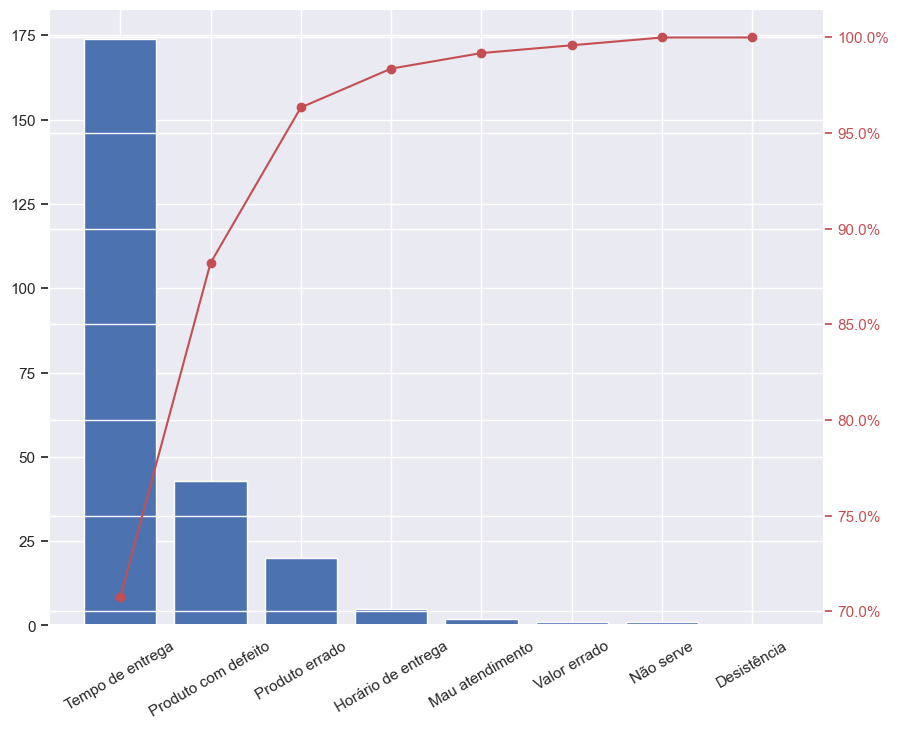

In [20]:
from matplotlib.ticker import PercentFormatter

plt.rc('figure', figsize=(10,8))
fig, axes = plt.subplots()

axes.bar(df.index, df["contagem"])

axes2 = axes.twinx()
axes2.plot(df.index, df["pctacum"], color="r", marker="o")
axes2.yaxis.set_major_formatter(PercentFormatter())

axes.tick_params(axis="x", rotation = 30)
axes2.tick_params(axis="y", colors="r")
plt.show()

#### Histograma Discreta x Freq

* O `Histograma` serve para analisarmos a distribuição da frequência em uma variável;
* Variáveis contínuas e discretas.

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


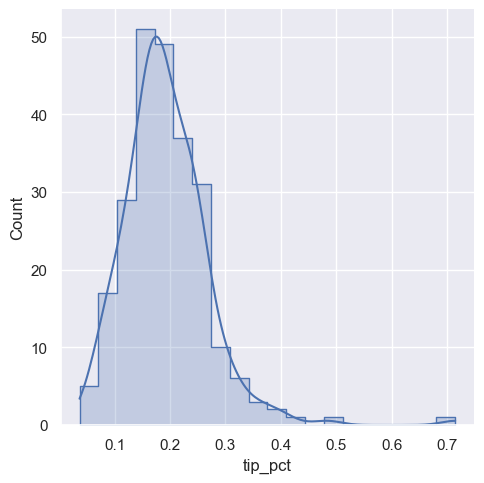

In [23]:
sns.displot(data = tips[tips['tip_pct']<1] 
            ,alpha = .25
            ,x = 'tip_pct'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

#### Boxplot Discreta x Contínua 1 entrada

* O `Boxplot` representa a divisão dos dados em uma variável de acordo com o comando `describe()` do pandas;
* usado para variáveis contínuas.

In [27]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [25]:
plt.rc('figure', figsize=(5,5))

<Axes: ylabel='total_bill'>

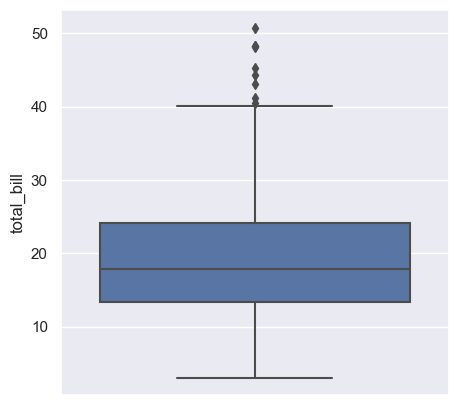

In [26]:
sns.boxplot(y="total_bill", data=tips[tips['tip_pct']<1])

#### Boxplot Categórica x Contínua 2 entradas

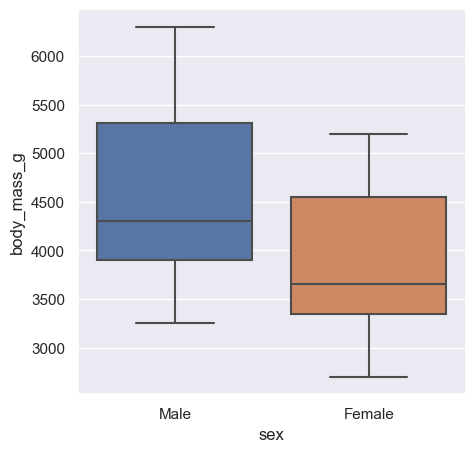

In [56]:
ax = sns.boxplot(x="sex", y="body_mass_g", data=penguins)

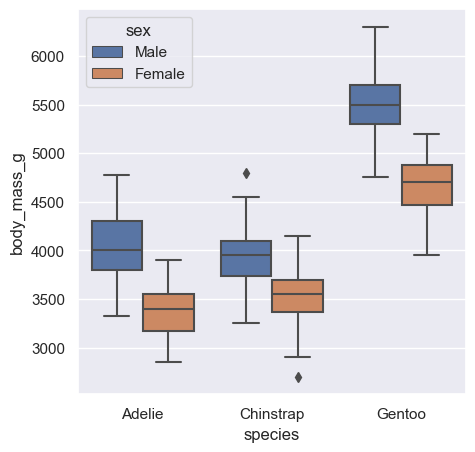

In [60]:
ax = sns.boxplot(data = penguins, y="body_mass_g", x="species", orient="v", hue='sex')

## Gráfico de barras 2 ou mais entradas

Agora podemos designar o tamanho de cada barra mediante a uma condição.

#### Countplot

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='count'>

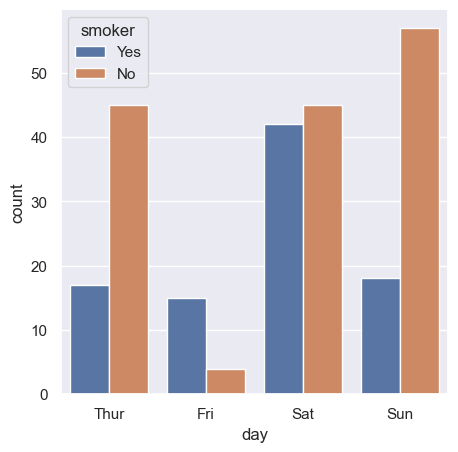

In [28]:
sns.countplot(x='day'
              , hue = 'smoker'
              , data=tips[tips.tip_pct < 1]
             )

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='smoker', ylabel='count'>

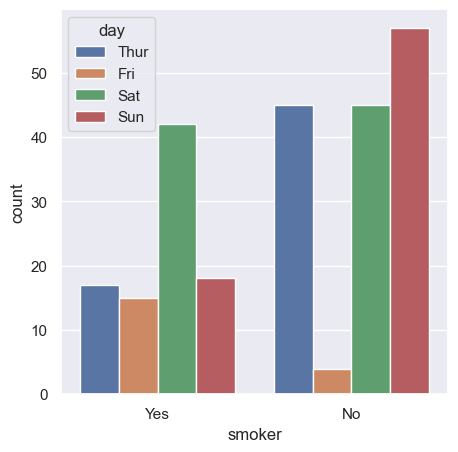

In [30]:
sns.countplot(x='smoker'
              , hue = 'day'
              , data=tips[tips.tip_pct < 1]
             )

#### Crosstab Pandas

* Este comando cruza os dados entre duas variáveis.

In [31]:
# Tabela cruzada
freq = pd.crosstab(tips['smoker'], tips['day'])
freq

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


In [32]:
freq.sum(axis = 1)

smoker
Yes     93
No     151
dtype: int64

* O comando abaixo divide cada cada valor da tabela pelo número total da soma acima.

In [33]:
# Fumantes e não fumantes preferem que dia da semana?
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,0.182796,0.16129,0.451613,0.204301
No,0.298013,0.02649,0.298013,0.377483


In [36]:
#Resultu em 100%
freq_pctlin.sum(axis = 1)

smoker
Yes    1.0
No     1.0
dtype: float64

<Axes: xlabel='smoker'>

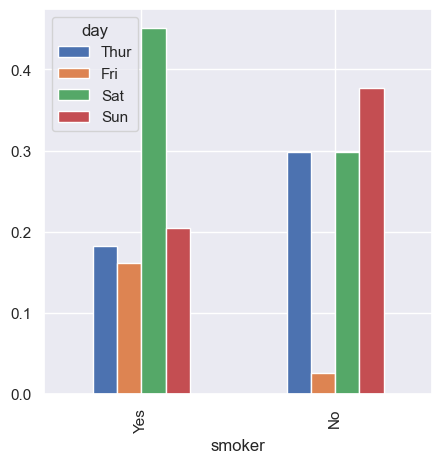

In [40]:
freq_pctlin.plot.bar()

#### Catplot

* É a mesma coisa que o `Barplot` porém com funcionalidades a mais.

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18040\2975100030.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='day', y='total_bill'
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has

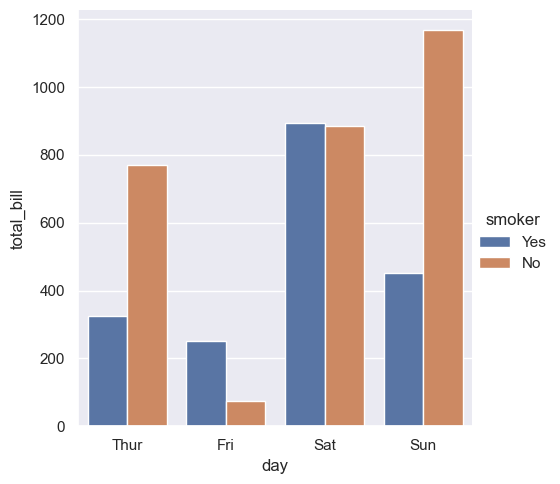

In [41]:
# Em que dia da semana fumantes consomem mais?
sns.catplot(x='day', y='total_bill'
            , hue = 'smoker'
            , kind='bar'
            , estimator = sum
            , data=tips[tips.tip_pct < 1]
            , ci = None
           )

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

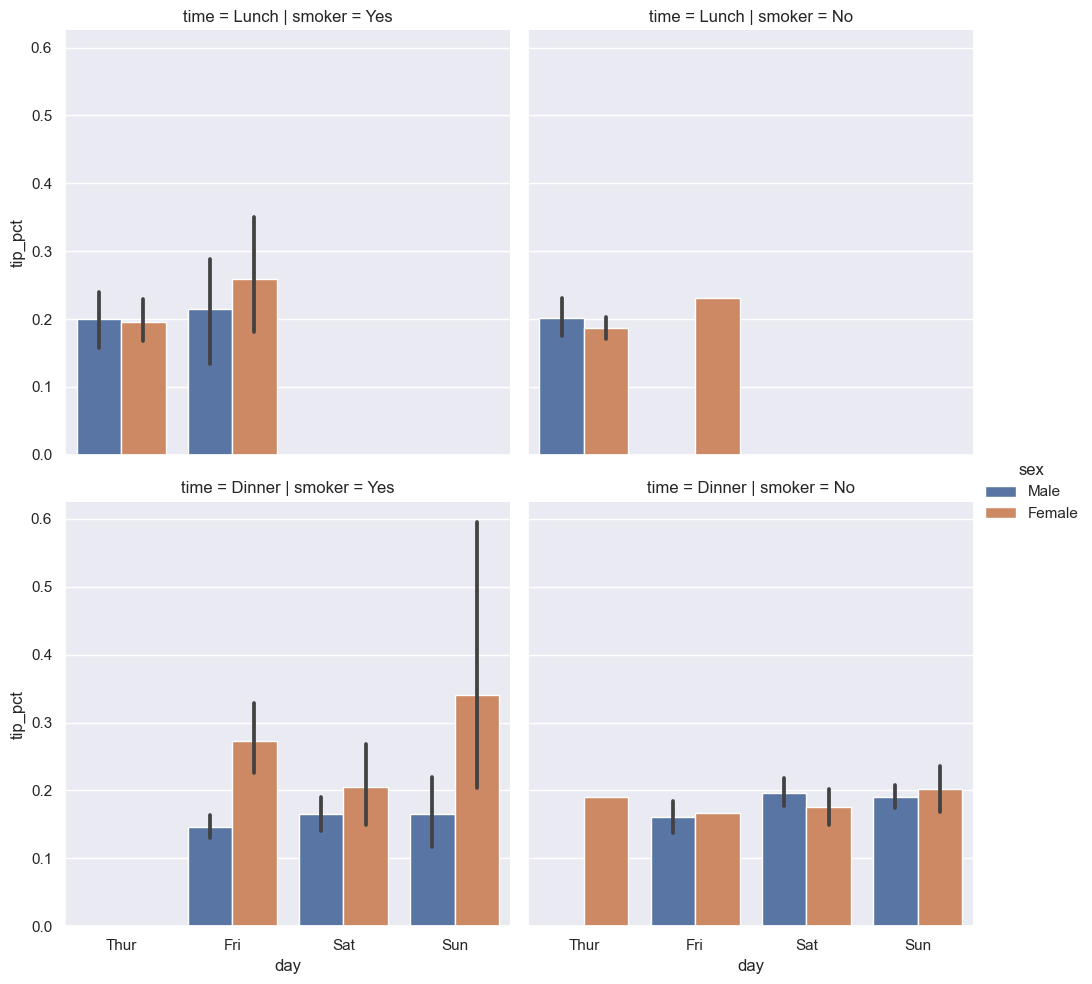

In [51]:
# Fazendo uma grade de gráficos
sns.catplot(x='day', y='tip_pct'
            , row='time'
            , col='smoker'
            , hue = 'sex'
            , kind='bar'
            , data=tips[tips.tip_pct < 1]
           )

## Variáveis Contínuas x Contínuas

### Scatterplot

* Gráfico de dispersão simples para relacionar duas variáveis;
* Aqui organiza-se a variável resposta no eixo y;
* Variável explicativa no eixo x.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

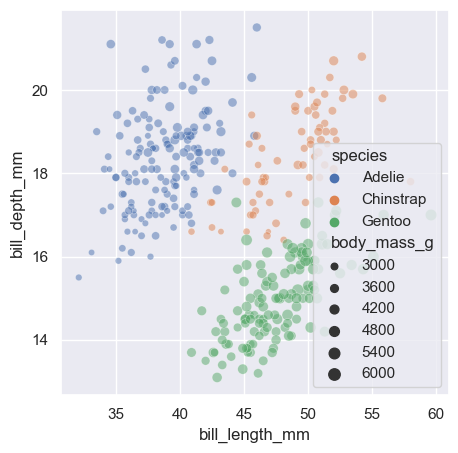

In [71]:
sns.scatterplot(x = 'bill_length_mm'
                , y = 'bill_depth_mm'
                , data = penguins
                , alpha = .5
                , hue = 'species'
                , size = 'body_mass_g'
               )

### Gráficos com muitos pontos
Quando temos muitos pontos, pode se tornar complicado encontrar padrões nesse tipo de gráfico. Algumas ideias são:

- Amostrar os dados
- Utilizar transparência (alpha menor que 1)
- Fazer o 'scatterplot 2D'

#### Joinplot Histograma 2D

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

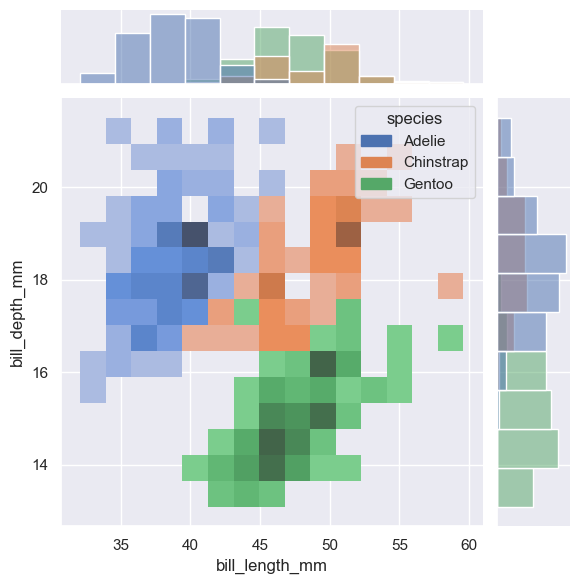

In [78]:
plt.rc('figure', figsize=(4,4))
sns.jointplot(x = 'bill_length_mm'
              , y = 'bill_depth_mm'
              , hue='species'
              , data = penguins
              , kind="hist"
              , bins = [15, 15])

#### Joinplot Dispersão 2D

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


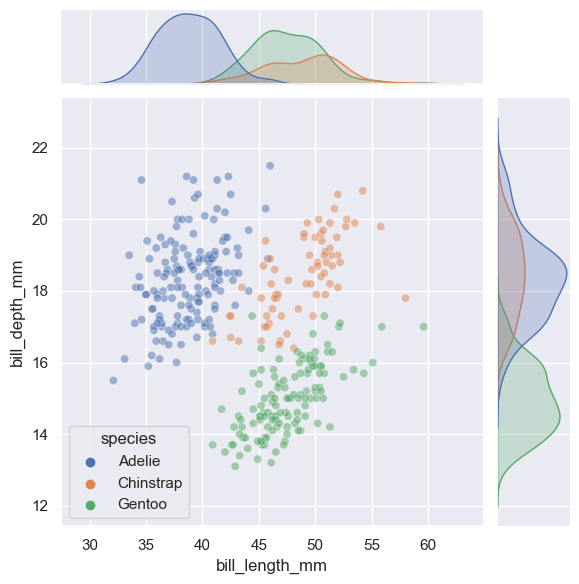

In [79]:
sns.jointplot(data=penguins, 
              x="bill_length_mm", 
              y="bill_depth_mm", 
              hue = 'species',
              alpha=0.5)

#### Grade de gráficos de Dispersão

* Cruzamento entre todas as variáveis do dataset em diferentes gráficos.

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

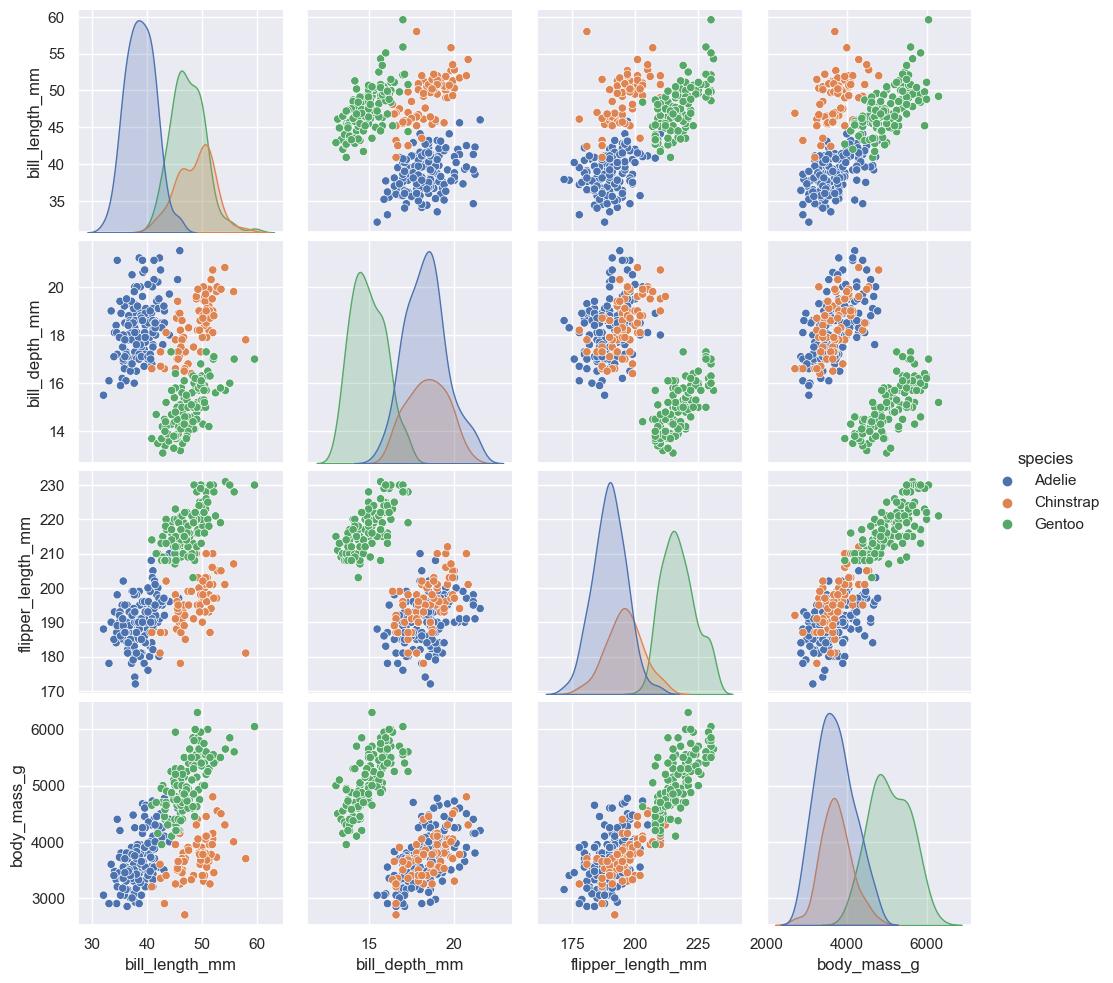

In [83]:
plt.rc('figure', figsize=(3,3))
sns.pairplot(penguins, hue='species')

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

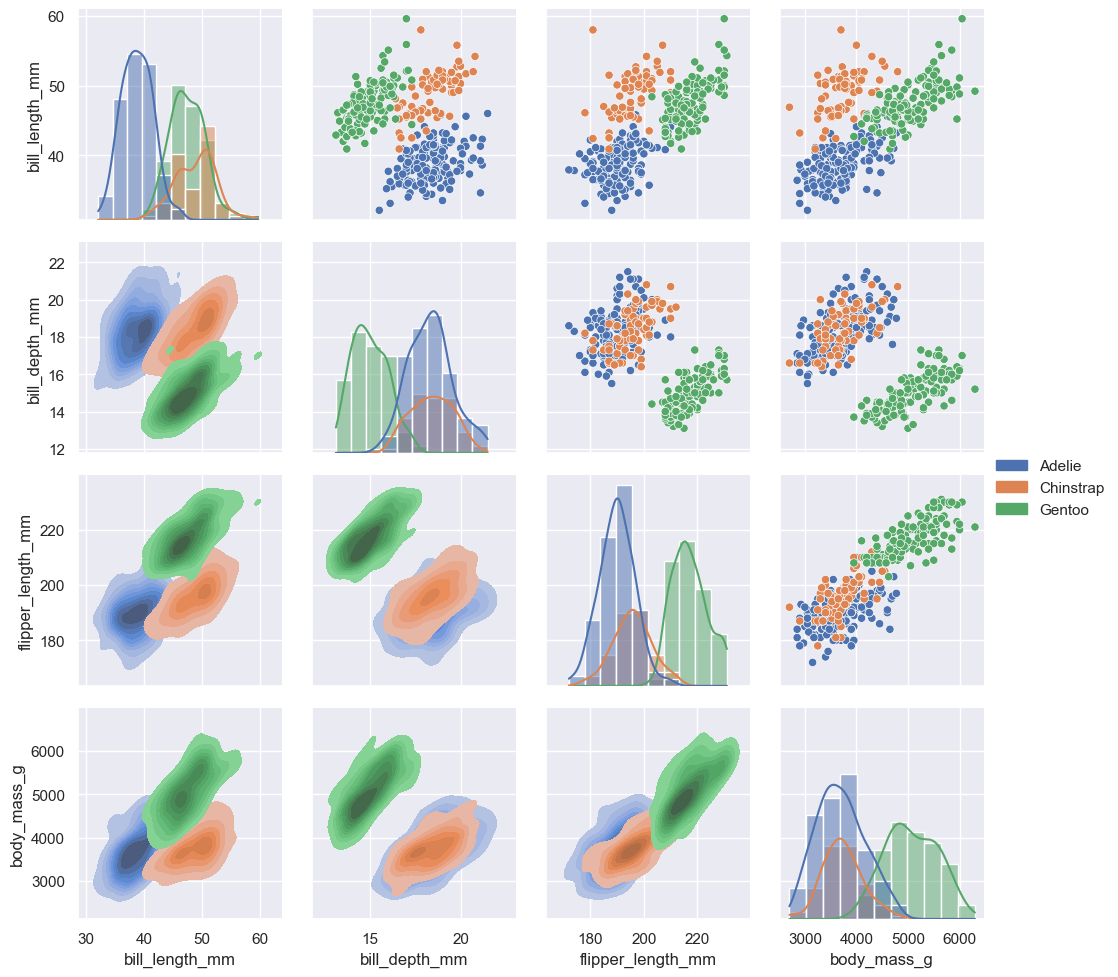

In [85]:
g = sns.PairGrid(penguins, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend(title="", adjust_subtitles=True)